In [1]:
from knowknow import *

from load_db import db as dta

loading variable anthro-wos-clean/_attributes from disk
loading variable anthro-wos-clean/groups from disk
loading variable anthro-wos-clean/group_reps from disk


In [2]:
from params import *

In [3]:
from knowknow.viz import yearly_counts_table_simp

In [4]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = str(dta.trend('c', tname).first) + "*"
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [5]:
top_df = stats.top_decade_stratified(dta, 'c', topN=20, maxP = 0.1, debug=False, yRange=(1940,2015))

loading variable anthro-wos-clean/ind ___ c.fy from disk
loading variable anthro-wos-clean/ind ___ fy from disk
(153, 12)


In [6]:
top_df.head()

,last,type,maxpropy,first,maxcount,totalprop,total,maxprop,name,maxcounty,first_added,pub
0,2014,book,1943,1938,6,0.207593,155,0.029126,"Linton, R.|study man",1982,1940,NaN
1,2015,book,1943,1943,7,0.050870,84,0.009709,"Boas, F.|race language cultur",2003,1947,NaN
2,2014,book,1966,1958,8,0.034372,101,0.004308,"Willey, G.|method theory am arc",1966,1955,NaN
3,2015,book,1974,1971,10,0.018958,204,0.001288,"Dumont, L.|homo hierarchicus",1992,1983,NaN
4,2014,book,1951,1951,4,0.042206,68,0.007722,"Eggan, F.|social org w pueblos",1954,1944,NaN


In [7]:
dd = {}

In [8]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = dta.trend('c', tname).first
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [11]:
names = sorted(top_df['name'])

yearlim=(1920,2015)
print_names= {k: key2name(k) for k in top_df['name']}
tickstep=30

# Top 20 cited works in each decade

In [12]:
NCOLS = 3

/home/alec/envs/kk/lib/python3.9/site-packages/knowknow/viz.py:383: RuntimeWarning: invalid value encountered in true_divide
  tt = tt / ttm


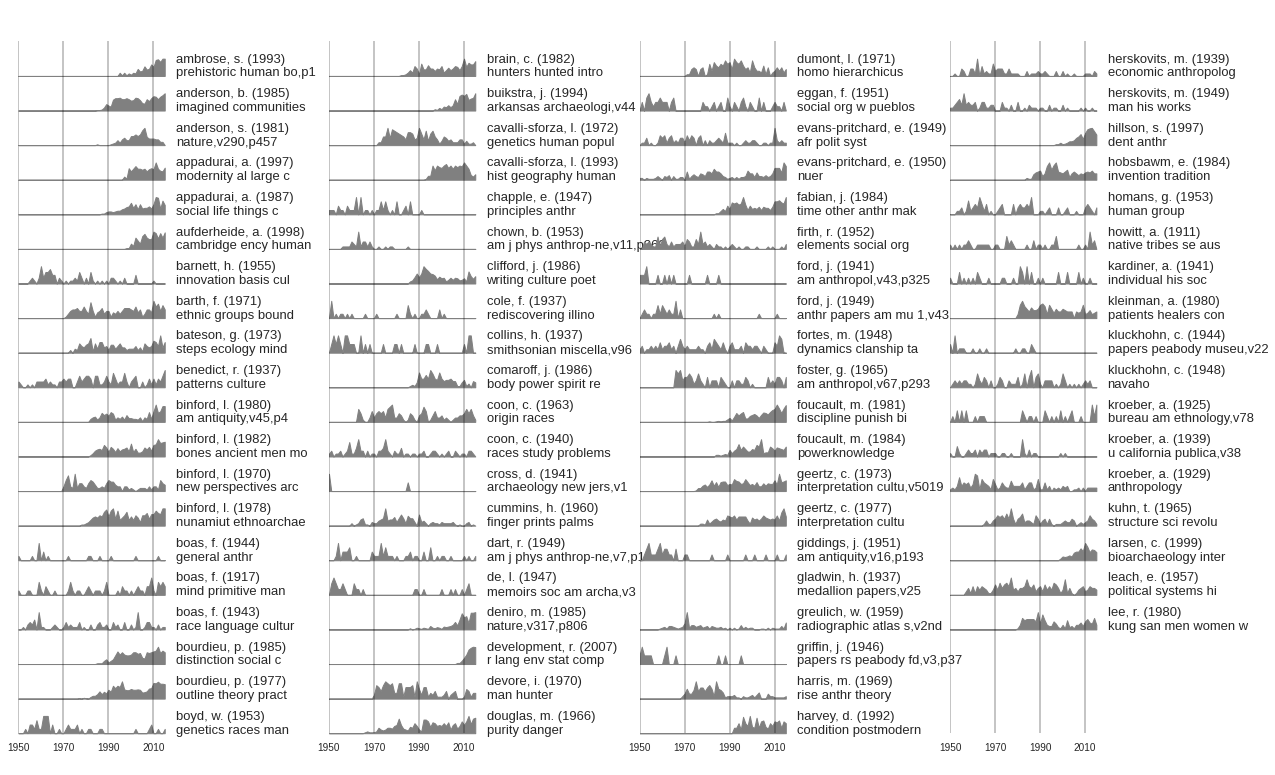

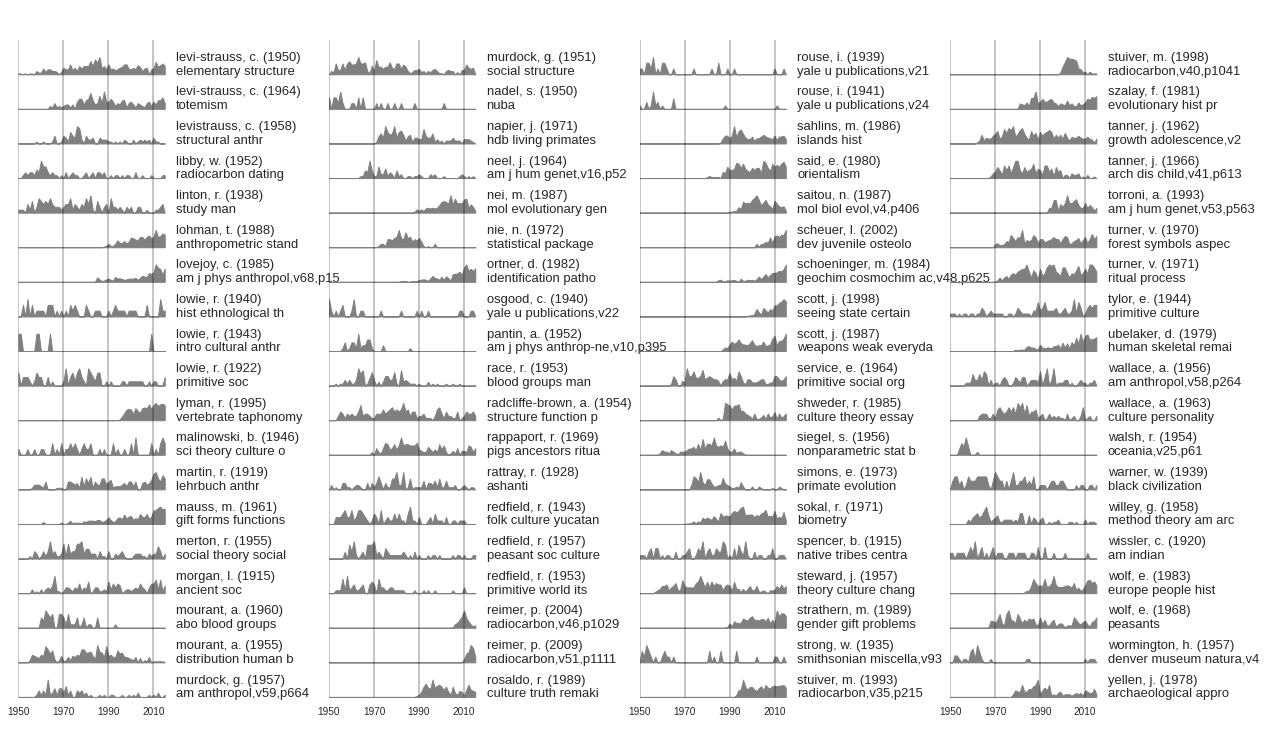

In [14]:
NPAGES = 2
nper = len(names) // NPAGES + int(len(names)%NPAGES != 0)
for i in range(NPAGES):
    mynames = names[i*nper:(i+1)*nper]
    viz.yearly_counts_table_simp(dta, mynames, NCOLS=4, print_names={k:key2name(k) for k in mynames}, yearlim=(1950,2015))
    plt.savefig('top20.nomark.%s.png'%i)

In [15]:
mk = {r['name']:(r.first_added,r.first_added+10) for i,r in top_df.iterrows()}

In [16]:
len(names)

153

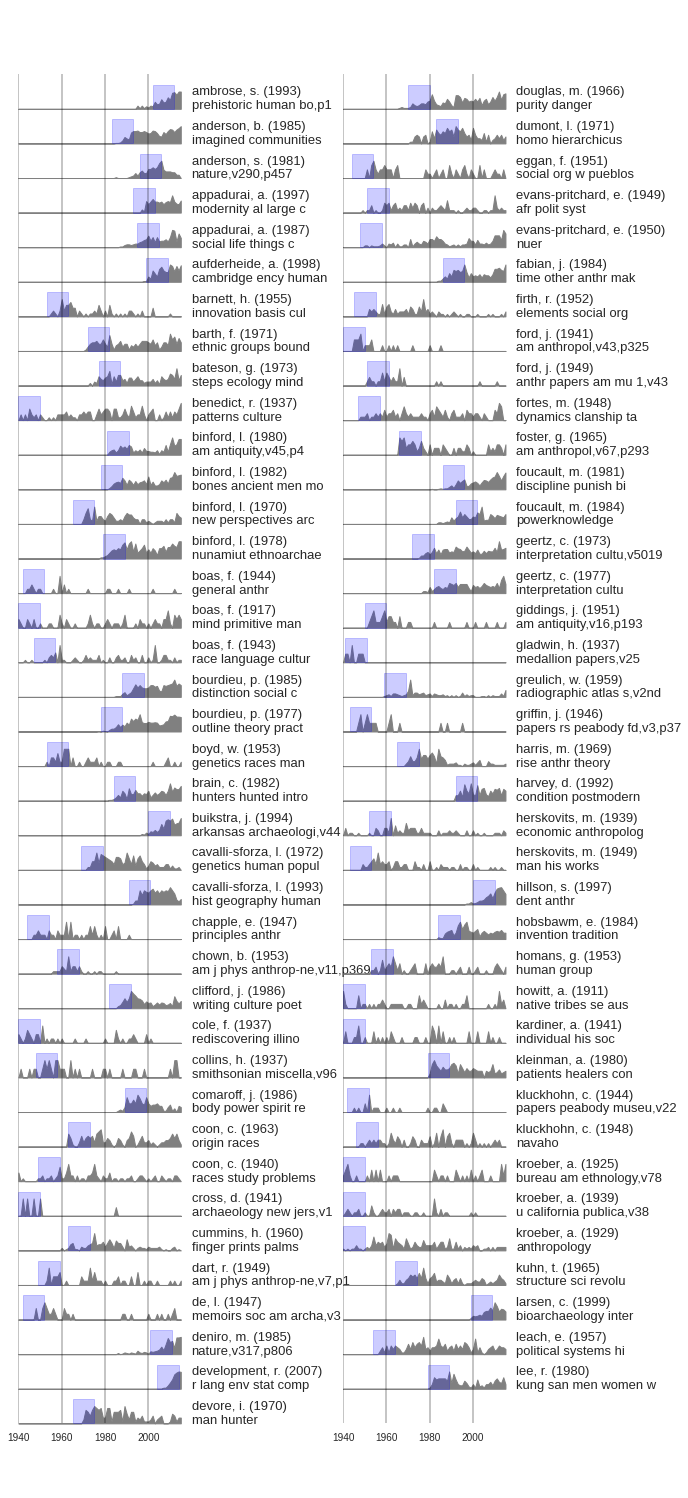

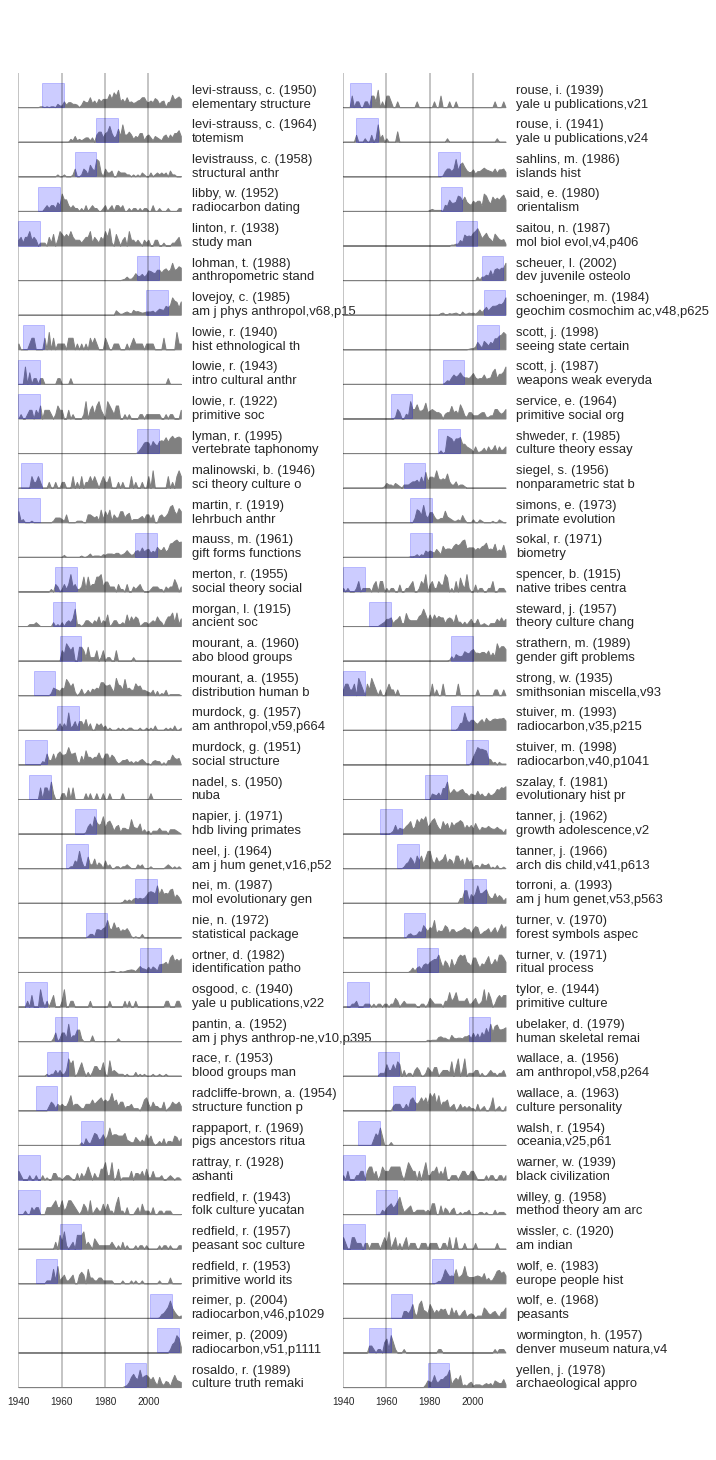

In [18]:
NPAGES = 2
nper = len(names) // NPAGES + int(len(names)%NPAGES != 0)
for i in range(NPAGES):
    mynames = names[i*nper:(i+1)*nper]
    viz.yearly_counts_table_simp(dta, mynames, NCOLS=2, print_names={k:key2name(k) for k in mynames}, markranges=mk, yearlim=(1940,2015))
    plt.savefig('top20.longer.%s.png'%i)

In [19]:
without_many_now = []
total = 0

for n in names:
    t = dta.trend('c', n)
    tot = t.sum_between(2000,2015)
    if t.first >= 1960:
        continue
        
    total += 1
    if tot < 10:
        without_many_now.append(n)
        continue

In [20]:
total

72

In [21]:
len(without_many_now)

40

In [22]:
11/56

0.19642857142857142

In [23]:
parts = []
for x in without_many_now:
    tt = dta.trend('c', x)
    c = tt.sum_between(2000,2015)
    parts.append( "%s (%s)" % (
        x.split(",")[0],
        "%s; %s citation%s" %(
            'd',
            c,
            "s" if c > 1 else "",
            #tt.first # , first cited in %s
        )
    ) )

In [24]:
", ".join(parts)

'Barnett (d; 4 citations), Boas (d; 2 citations), Boyd (d; 6 citations), Chapple (d; 0 citation), Chown (d; 0 citation), Cole (d; 1 citation), Collins (d; 5 citations), Cross (d; 0 citation), Dart (d; 6 citations), De (d; 7 citations), Firth (d; 6 citations), Ford (d; 0 citation), Ford (d; 2 citations), Giddings (d; 4 citations), Gladwin (d; 0 citation), Griffin (d; 0 citation), Herskovits (d; 6 citations), Howitt (d; 9 citations), Kardiner (d; 6 citations), Kluckhohn (d; 0 citation), Kroeber (d; 1 citation), Libby (d; 6 citations), Lowie (d; 1 citation), Murdock (d; 8 citations), Nadel (d; 1 citation), Osgood (d; 4 citations), Pantin (d; 0 citation), Race (d; 3 citations), Redfield (d; 8 citations), Redfield (d; 6 citations), Redfield (d; 3 citations), Rouse (d; 2 citations), Rouse (d; 1 citation), Siegel (d; 0 citation), Strong (d; 4 citations), Walsh (d; 0 citation), Warner (d; 9 citations), Willey (d; 8 citations), Wissler (d; 2 citations), Wormington (d; 4 citations)'